In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startup_data=pd.read_csv("C:\Games\Bhag Milkha Bhag 2013 Hindi MC DVDScr Xvid AC3 IcTv\Desktop\CSV\Startups.csv")

In [3]:
startup_data.head()

,R&DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_data.columns

Index(['R&DSpend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [5]:
startup_data.shape

(50, 5)

In [6]:
startup_data.isnull().sum()

R&DSpend          0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0xb9fadc0>,
 'caps': [<matplotlib.lines.Line2D at 0xba144c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb9faa60>],
 'medians': [<matplotlib.lines.Line2D at 0xba14b80>],
 'fliers': [<matplotlib.lines.Line2D at 0xba14e80>],
 'means': []}

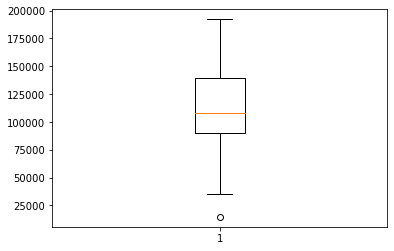

In [7]:
plt.boxplot(startup_data.Profit)

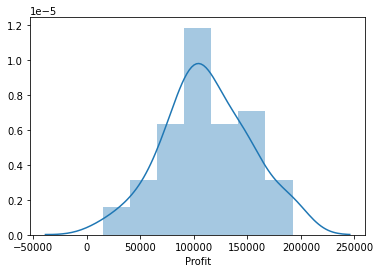

In [8]:
sns.distplot(startup_data.Profit)

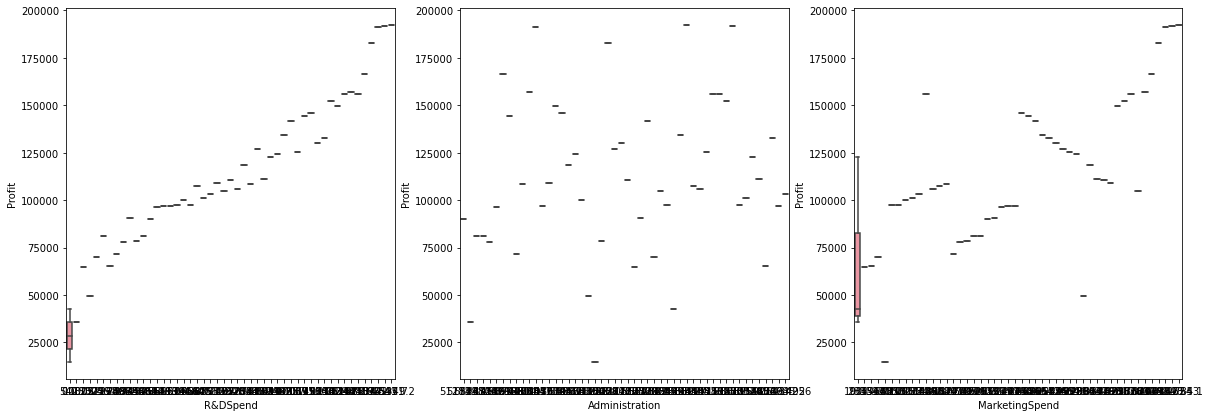

In [9]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'R&DSpend', y = 'Profit', data = startup_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Administration', y = 'Profit', data = startup_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'MarketingSpend', y = 'Profit', data = startup_data)
plt.show()

In [10]:
startup_data.corr()

,R&DSpend,Administration,MarketingSpend,Profit
R&DSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
labelencoder = LabelEncoder()

In [13]:
startup_data.iloc[:, 3] = labelencoder.fit_transform(startup_data.iloc[:, 3])

In [14]:
startup_data.head()

,R&DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [17]:
startup_data.dtypes

R&DSpend          float64
Administration    float64
MarketingSpend    float64
State               int32
Profit            float64
dtype: object

In [18]:
startup_data.corr()

,R&DSpend,Administration,MarketingSpend,State,Profit
R&DSpend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [19]:
import seaborn as sns

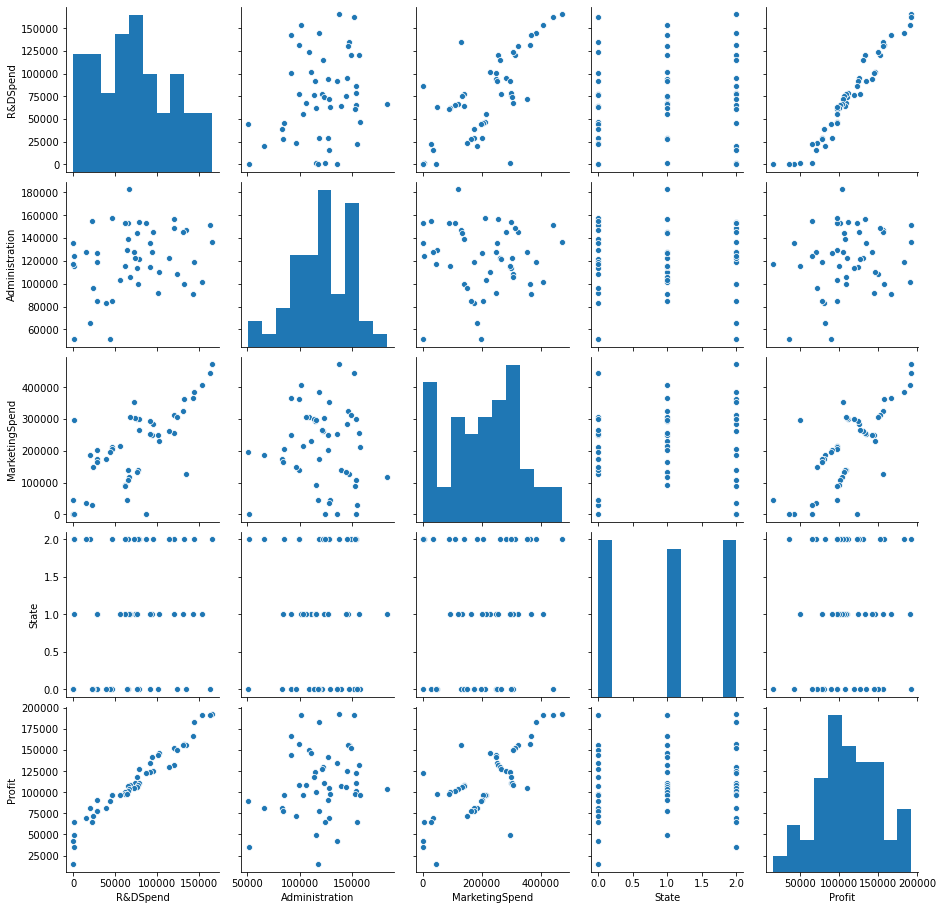

In [20]:
sns.pairplot(startup_data)

In [21]:
from patsy import PatsyError

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_startup_data = scaler.fit_transform(startup_data)


In [29]:
scaled_startup_data

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         1.21267813e+00,  2.01120333e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
        -1.21267813e+00,  1.99942997e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.98084225e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.21267813e+00,  1.77662724e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.35774012e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.21267813e+00,  1.12724963e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
        -1.21267813e+00,  1.10548055e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.09620987e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
         1.21267813e+00,  1.00746967e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
        -1.21267813e+00

In [31]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~R&DSpend+Administration+MarketingSpend+State',data=startup_data).fit()

PatsyError: Error evaluating factor: NameError: name 'R' is not defined
    Profit~R&DSpend+Administration+MarketingSpend+State
           ^^^^^^^^

In [32]:
start=startup_data.rename({'R&DSpend' : 'Spend'}, axis=1).head()

In [33]:
start

,Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [34]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~Spend+Administration+MarketingSpend+State',data=start).fit()

In [35]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -0.0
Spend             0.0
Administration    0.0
MarketingSpend   -0.0
State             0.0
dtype: float64 
 Intercept        NaN
Spend            NaN
Administration   NaN
MarketingSpend   NaN
State            NaN
dtype: float64


C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [36]:
(model.rsquared,model.rsquared_adj)

C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


(1.0, nan)

In [42]:
model_Spend=smf.ols('Profit~Spend',data=start).fit()

In [43]:
(model_Spend.rsquared,model_Spend.rsquared_adj)

(0.6741129092334608, 0.5654838789779477)

In [44]:
print(model_Spend.tvalues, '\n', model_Spend.pvalues)

Intercept    0.940108
Spend        2.491113
dtype: float64 
 Intercept    0.416516
Spend        0.088397
dtype: float64


In [45]:
model_Admin=smf.ols('Profit~Administration',data=start).fit()

In [46]:
print(model_Admin.tvalues, '\n', model_Admin.pvalues)

Intercept         6.476855
Administration    1.669922
dtype: float64 
 Intercept         0.007470
Administration    0.193527
dtype: float64


In [47]:
(model_Admin.rsquared,model_Admin.rsquared_adj)

(0.4817435184974207, 0.30899135799656097)

In [48]:
model_Market=smf.ols('Profit~MarketingSpend',data=start).fit()

In [49]:
print(model_Market.tvalues, '\n', model_Market.pvalues)

Intercept         2.715504
MarketingSpend    2.356727
dtype: float64 
 Intercept         0.072825
MarketingSpend    0.099695
dtype: float64


In [50]:
(model_Market.rsquared,model_Market.rsquared_adj)

(0.6492936157409133, 0.532391487654551)

In [51]:
model_State=smf.ols('Profit~State',data=start).fit()

In [52]:
print(model_State.tvalues, '\n', model_State.pvalues)

Intercept    17.120893
State        -0.068402
dtype: float64 
 Intercept    0.000434
State        0.949769
dtype: float64


In [53]:
(model_State.rsquared,model_State.rsquared_adj)

(0.001557189276687021, -0.3312570809644173)

In [55]:
#calculating VIF 
rsq_Spend = smf.ols('Spend~Administration+MarketingSpend+State',data=start).fit().rsquared  
vif_Spend = 1/(1-rsq_Spend)

In [56]:
vif_Spend

490.8599356817666

In [57]:
rsq_Admin = smf.ols('Administration~Spend+MarketingSpend+State',data=start).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)

In [58]:
vif_Admin

4.840727701676574

In [59]:
rsq_Market = smf.ols('MarketingSpend~Spend+Administration+State',data=start).fit().rsquared  
vif_Market = 1/(1-rsq_Market)

In [60]:
vif_Market

523.2631359719504

In [61]:
rsq_State = smf.ols('State~MarketingSpend+Spend+Administration',data=start).fit().rsquared  
vif_State = 1/(1-rsq_State)

In [62]:
vif_State

15.447363866473145

In [63]:
df1 = {'Variables':['Spend','Administration','MarketingSpend','State'],'VIF':[vif_Spend,vif_Admin,vif_Market,vif_State]}
Vif_frame = pd.DataFrame(df1)  
Vif_frame


,Variables,VIF
0,Spend,490.859936
1,Administration,4.840728
2,MarketingSpend,523.263136
3,State,15.447364


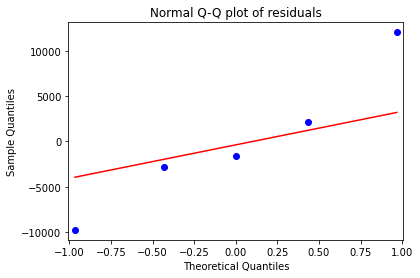

In [64]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [65]:
list(np.where(model.resid>10))

[array([0, 2], dtype=int64)]

In [66]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

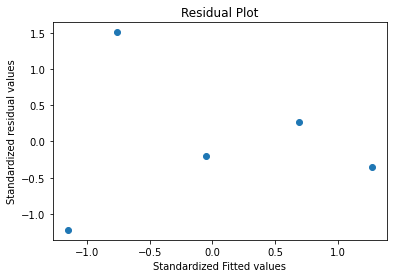

In [67]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [68]:
#Detecting Influencers/Outliers
#Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [69]:
model_influence.cooks_distance

(array([0.01806492, 0.18664608, 0.68058679, 0.00445   , 1.35918787]),
 array([0.98220326, 0.838689  , 0.57052782, 0.99556644, 0.3799906 ]))

<ipython-input-70-9e8564be66b2>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(start)), np.round(c, 3))


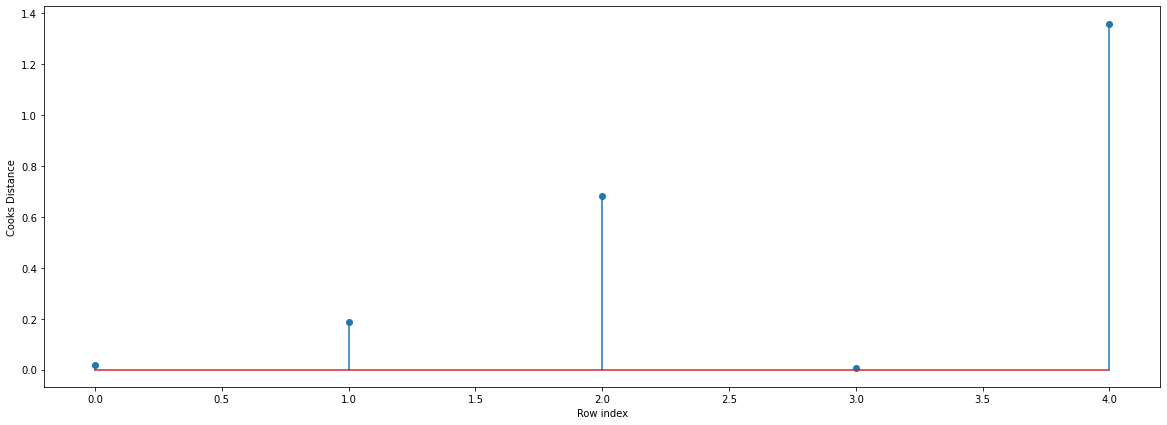

In [70]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(start)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(4, 1.3591878657987697)

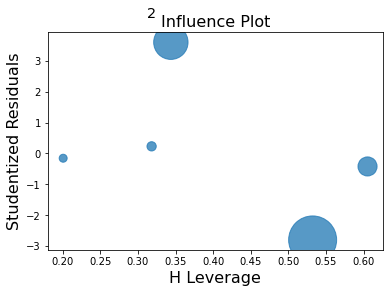

In [72]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [74]:
k = start.shape[1]
n = start.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [75]:
leverage_cutoff

3.5999999999999996

In [76]:
start[start.index.isin([4])]

,Spend,Administration,MarketingSpend,State,Profit
4,142107.34,91391.77,366168.42,1,166187.94


In [77]:
#Discard the data points which are influencers and reasign the row number (reset_index())
start1=start.drop(start.index[[4]],axis=0).reset_index()

In [78]:
#Drop the original index
start1=start1.drop(['index'],axis=1)

In [79]:
start1

,Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99


In [80]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~Spend+Administration+MarketingSpend+State',data=start1).fit()

In [81]:
print(model.tvalues, '\n', model.pvalues)

Intercept         0.0
Spend             0.0
Administration   -0.0
MarketingSpend   -0.0
State             0.0
dtype: float64 
 Intercept        NaN
Spend            NaN
Administration   NaN
MarketingSpend   NaN
State            NaN
dtype: float64


C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [82]:
(model.rsquared,model.rsquared_adj)

C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Viresh Vanarote\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


(1.0, nan)